In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline

In [2]:
veri_seti = pd.read_excel('D:/BTK Akademi Eğitim/Veri Analizi/Proje/TurkishHeadlines.xlsx')

In [3]:
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from TurkishStemmer import TurkishStemmer

def preprocess_text(text):
    text = re.sub(r'[^a-zA-ZğüşıöçĞÜŞİÖÇ ]', '', text)
    text = text.lower()
    stop_words = set(stopwords.words('turkish'))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    stemmer = TurkishStemmer()
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

In [4]:
veri_seti.head()

,HABERLER,ETIKET
0,TÜİK verilerine göre sanayi ciro endeksi Ağust...,Ekonomi
1,Piyasa güne eksi rezervde başladı,Ekonomi
2,"Citigroup, Deutsche Bank ve HSBC Libor manipül...",Ekonomi
3,Gelişen piyasa yatırımcılarını en fazla 'Fed' ...,Ekonomi
4,Bitcoin fiyatında yükseliş hız kesmiyor,Ekonomi


In [5]:
veri_seti['HABERLER'] = veri_seti['HABERLER'].apply(preprocess_text)

In [6]:
# Kelime gömme
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=5)
tfidf_matrix = tfidf_vectorizer.fit_transform(veri_seti['HABERLER'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, veri_seti['ETIKET'], test_size=0.3, random_state=42)

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

In [9]:
svm_model = make_pipeline(SVC(kernel='linear'))
naive_bayes_model = MultinomialNB()
logistic_regression_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
ann_model = MLPClassifier()

In [10]:
svm_model.fit(X_train, y_train)
naive_bayes_model.fit(X_train, y_train)
logistic_regression_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
ann_model.fit(X_train, y_train)

MLPClassifier()

In [12]:
svm_preds = svm_model.predict(X_test)
nb_preds = naive_bayes_model.predict(X_test)
lr_preds = logistic_regression_model.predict(X_test)
rf_preds = random_forest_model.predict(X_test)
ann_preds = ann_model.predict(X_test)

In [13]:
svm_accuracy = accuracy_score(y_test, svm_preds)
nb_accuracy = accuracy_score(y_test, nb_preds)
lr_accuracy = accuracy_score(y_test, lr_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)
ann_accuracy = accuracy_score(y_test, ann_preds)

In [14]:
print("SVM Accuracy:", svm_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("ANN Accuracy:", ann_accuracy)

print("\nSVM Classification Report:")
print(classification_report(y_test, svm_preds))

SVM Accuracy: 0.9666666666666667
Naive Bayes Accuracy: 0.9658730158730159
Logistic Regression Accuracy: 0.9706349206349206
Random Forest Accuracy: 0.9071428571428571
ANN Accuracy: 0.9658730158730159

SVM Classification Report:
              precision    recall  f1-score   support

     Ekonomi       0.94      0.96      0.95       202
     Magazin       0.98      0.97      0.97       180
      Sağlık       0.98      0.95      0.97       174
     Siyaset       0.98      0.98      0.98       178
        Spor       0.99      0.98      0.98       171
   Teknoloji       0.92      0.95      0.94       168
       Yaşam       0.98      0.97      0.98       187

    accuracy                           0.97      1260
   macro avg       0.97      0.97      0.97      1260
weighted avg       0.97      0.97      0.97      1260


In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

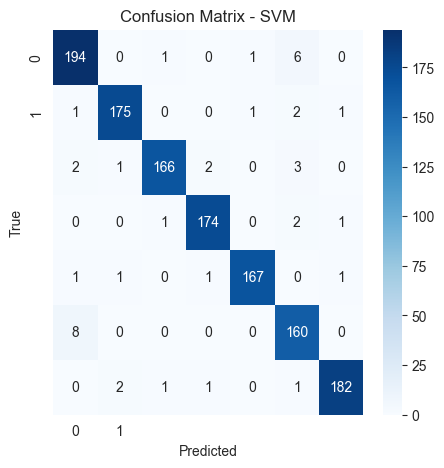

In [17]:
plot_confusion_matrix(y_test, svm_preds, 'SVM')

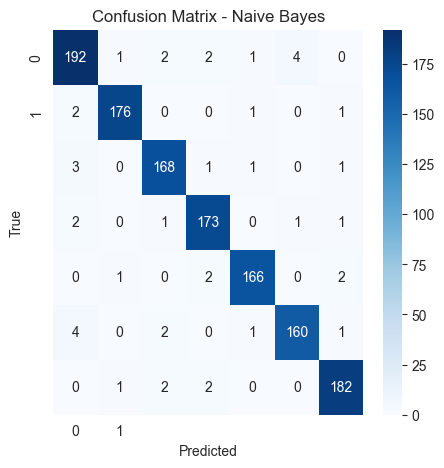

In [18]:
plot_confusion_matrix(y_test, nb_preds, 'Naive Bayes')


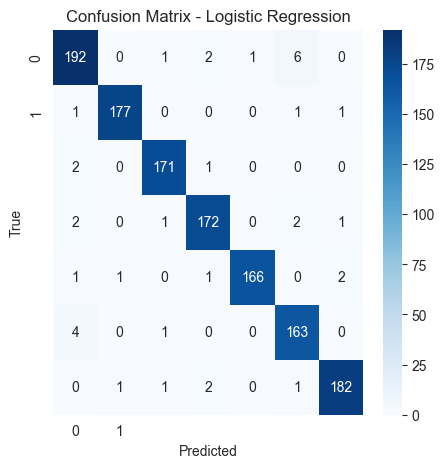

In [19]:
plot_confusion_matrix(y_test, lr_preds, 'Logistic Regression')

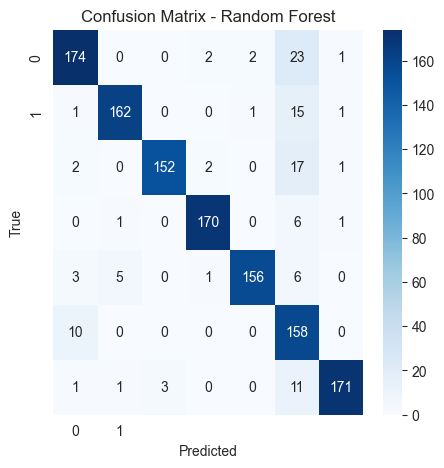

In [20]:
plot_confusion_matrix(y_test, rf_preds, 'Random Forest')

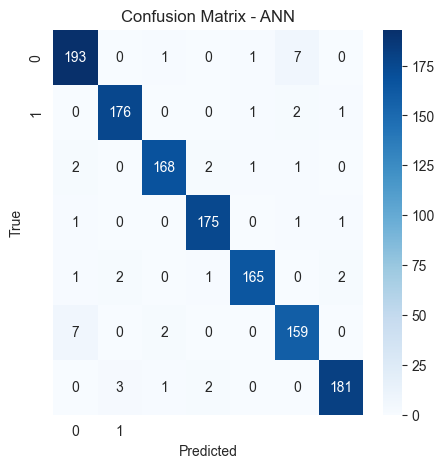

In [21]:
plot_confusion_matrix(y_test, ann_preds, 'ANN')

In [24]:
input_headline = input("Bir haber başlığı girin: ")

In [25]:
input_headline = preprocess_text(input_headline)

In [26]:
input_vector = tfidf_vectorizer.transform([input_headline])


In [27]:
prediction = svm_model.predict(input_vector)


In [28]:
print(prediction)

['Teknoloji']
